#Installing the needed libraries:

In [1]:
!pip install SQLAlchemy==1.4.46
!pip install pandasql
!pip install pandas_profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.8 MB/s eta 0:00:00
  Attempting uninstall: SQLAlchemy
    Found existing installation: SQLAlchemy 2.0.10
    Uninstalling SQLAlchemy-2.0.10:
      Successfully uninstalled SQLAlchemy-2.0.10
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26771 sha256=be1ce7fa95ba7c09a69287337d0abcb0a36439ccd788723bd3ad50b271231334
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from  pandasql import sqldf                           #to sql with dataframes
import pandas as pd                                   #to create dataframes and manipulate data
from pandas_profiling import ProfileReport            #to create a report for the dataframe and show different analyses and visualizations
import matplotlib.pyplot as plt                       #to create visualizations
import seaborn as sns                                 #to create visualizations
import panel as pn                                    #to create an interactive dashboard
pn.extension()

<ipython-input-2-b3f45cd50e17>:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport            #to create a report for the dataframe and show different analyses and visualizations


In [3]:
SQL = lambda q: sqldf(q, globals())                   #created a lambda function that gets the query string and global variables

# Cleaning data

In [4]:
#get the dataframe (table)
sales_data = pd.read_csv("/content/drive/MyDrive/sales_data.csv")
sales_data

,date,product,category,price,quantity,revenue
0,2022-01-01,Smartphone,Electronics,600.0,10.0,6000.0
1,2022-01-01,Laptop,Electronics,1200.0,5.0,6000.0
2,2022-01-02,T-Shirt,Clothing,20.0,50.0,1000.0
3,2022-01-03,Headphones,Electronics,100.0,20.0,2000.0
4,2022-01-04,T-Shirt,Clothing,20.0,25.0,500.0
...,...,...,...,...,...,...
364,2022-12-27,Watch,Accessories,150.0,5.0,750.0
365,2022-12-28,Coat,Clothing,100.0,5.0,500.0
366,2022-12-29,Headphones,Electronics,100.0,10.0,1000.0
367,2022-12-30,Smartphone,Electronics,600.0,11.0,6600.0


In [5]:
#handeling spelling mistakes
sales_data["category"] = sales_data["category"].replace(["Clohting", "Bgas", "Shoeses"], ["Clothing", "Bags", "Shoes"])

In [6]:
#handeling missing values 
sales_data[sales_data.isna().any(axis=1)]

,date,product,category,price,quantity,revenue
96,2022-04-05,Smartwatch,Accessories,200.0,10.0,NaN
122,2022-05-01,Smartphone,Electronics,600.0,NaN,6600.0
193,2022-07-11,Watch,Accessories,NaN,15.0,2250.0
320,2022-11-13,Wallet,Accessories,NaN,35.0,1050.0


In [7]:
sales_data["revenue"].iloc[96] = sales_data["price"].iloc[96] * sales_data["quantity"].iloc[96]
sales_data["quantity"].iloc[122] = sales_data["revenue"].iloc[122] / sales_data["price"].iloc[122]
sales_data["price"].iloc[193] = sales_data["revenue"].iloc[193] / sales_data["quantity"].iloc[193]
sales_data["price"].iloc[320] = sales_data["revenue"].iloc[320] / sales_data["quantity"].iloc[320]

<ipython-input-7-dbb87bbc7c3a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data["revenue"].iloc[96] = sales_data["price"].iloc[96] * sales_data["quantity"].iloc[96]
<ipython-input-7-dbb87bbc7c3a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data["quantity"].iloc[122] = sales_data["revenue"].iloc[122] / sales_data["price"].iloc[122]
<ipython-input-7-dbb87bbc7c3a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sale

In [8]:
#drop duplicates
sales_data = sales_data.drop_duplicates()
sales_data

,date,product,category,price,quantity,revenue
0,2022-01-01,Smartphone,Electronics,600.0,10.0,6000.0
1,2022-01-01,Laptop,Electronics,1200.0,5.0,6000.0
2,2022-01-02,T-Shirt,Clothing,20.0,50.0,1000.0
3,2022-01-03,Headphones,Electronics,100.0,20.0,2000.0
4,2022-01-04,T-Shirt,Clothing,20.0,25.0,500.0
...,...,...,...,...,...,...
364,2022-12-27,Watch,Accessories,150.0,5.0,750.0
365,2022-12-28,Coat,Clothing,100.0,5.0,500.0
366,2022-12-29,Headphones,Electronics,100.0,10.0,1000.0
367,2022-12-30,Smartphone,Electronics,600.0,11.0,6600.0


Text(0.5, 0, 'day')

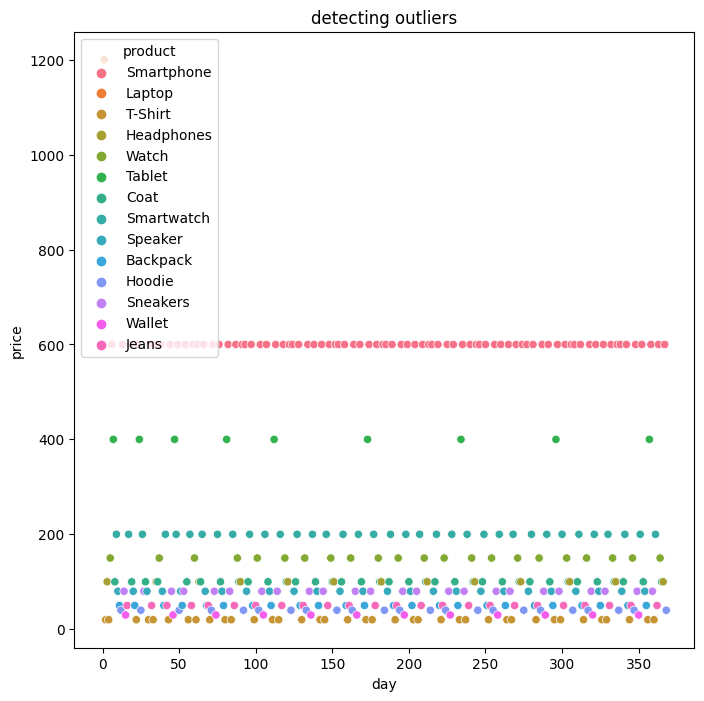

In [9]:
#detecting outliers
plt.Figure(figsize=(6,6))
f, ax = plt.subplots(1, figsize=(8,8))
plt.title("detecting outliers")
sns.scatterplot(data=sales_data, x=sales_data.index, y="price", hue="product")
plt.xlabel("day")

#Data Description

In [10]:
sales_data.describe()

,price,quantity,revenue
count,368.000000,368.000000,368.000000
mean,211.032609,14.513587,2062.853261
std,227.068797,8.559765,1910.403972
min,20.000000,3.000000,300.000000
25%,50.000000,8.000000,800.000000
50%,100.000000,12.000000,1200.000000
75%,250.000000,20.000000,2400.000000
max,1200.000000,50.000000,7200.000000


#Answering questions
* What was the total revenue generated by the company over the course of the year?
* Which product had the highest revenue? How much revenue did it generate?
* What was the average price of a product sold by the company?
* What was the total quantity of products sold by the company?
* Which category had the highest revenue? How much revenue did it generate?
* What was the average revenue per sale?
* What was the total revenue generated in each quarter of the year? (i.e. Q1, Q2, Q3, Q4)

In [11]:
#What was the total revenue generated by the company over the course of the year?
sales_data["revenue"].sum()

759130.0

In [12]:
query = """
          SELECT date, SUM(revenue) as revenue
          FROM sales_data
          GROUP BY date
        """

date_vs_revenue = SQL(query)
date_vs_revenue

,date,revenue
0,2022-01-01,12000.0
1,2022-01-02,1000.0
2,2022-01-03,2000.0
3,2022-01-04,500.0
4,2022-01-05,1500.0
...,...,...
360,2022-12-27,750.0
361,2022-12-28,500.0
362,2022-12-29,1000.0
363,2022-12-30,6600.0


Text(0.5, 0, 'categories')

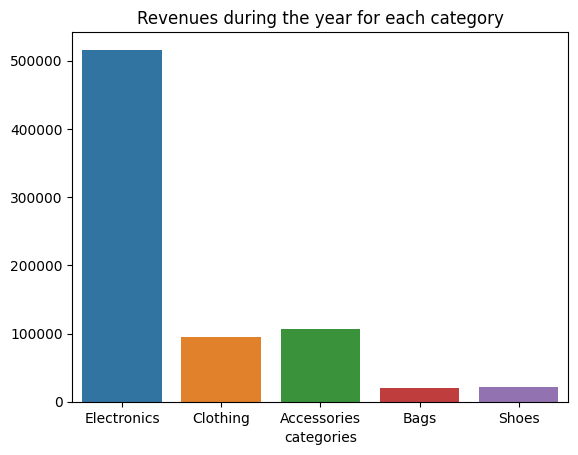

In [13]:
plt.Figure(figsize=(15,6))
plt.title("Revenues during the year for each category")
sns.barplot(x=sales_data["category"].unique(), 
            y=[sales_data["revenue"].loc[(sales_data.category == "Electronics")].sum(), 
               sales_data["revenue"].loc[(sales_data.category == "Clothing")].sum(), 
               sales_data["revenue"].loc[(sales_data.category == "Accessories")].sum(),
               sales_data["revenue"].loc[(sales_data.category == "Bags")].sum(),
               sales_data["revenue"].loc[(sales_data.category == "Shoes")].sum()], 
            errorbar=None)
plt.xlabel("categories")

In [14]:
#Which category had the highest revenue? How much revenue did it generate?
sales_data["revenue"].loc[(sales_data.category == "Electronics")].sum()

516080.0

In [15]:
total_revenue = sales_data["revenue"].sum()
total_revenue

759130.0

In [16]:
products = sales_data["product"].unique()
products

array(['Smartphone', 'Laptop', 'T-Shirt', 'Headphones', 'Watch', 'Tablet',
       'Coat', 'Smartwatch', 'Speaker', 'Backpack', 'Hoodie', 'Sneakers',
       'Wallet', 'Jeans'], dtype=object)

In [17]:
#What was the average price of a product sold by the company?
sum = 0
for item in products:
  sum += sales_data["price"].loc[(sales_data["product"] == item)].unique()[0]
avg_product_price = sum/len(products)
avg_product_price

221.42857142857142

In [18]:
#What was the total quantity of products sold by the company?
sales_data["quantity"].sum()

5341.0

In [19]:
query_1 = """
            SELECT product, SUM(revenue) as revenue
            FROM sales_data
            GROUP BY product
            ORDER BY revenue
          """
product_vs_revenue = SQL(query_1)
product_vs_revenue

,product,revenue
0,Laptop,6000.0
1,Wallet,13200.0
2,Headphones,18000.0
3,Tablet,18000.0
4,Hoodie,19800.0
5,T-Shirt,20100.0
6,Backpack,20400.0
7,Jeans,20650.0
8,Sneakers,21600.0
9,Watch,32700.0


Text(0.5, 0, 'categories')

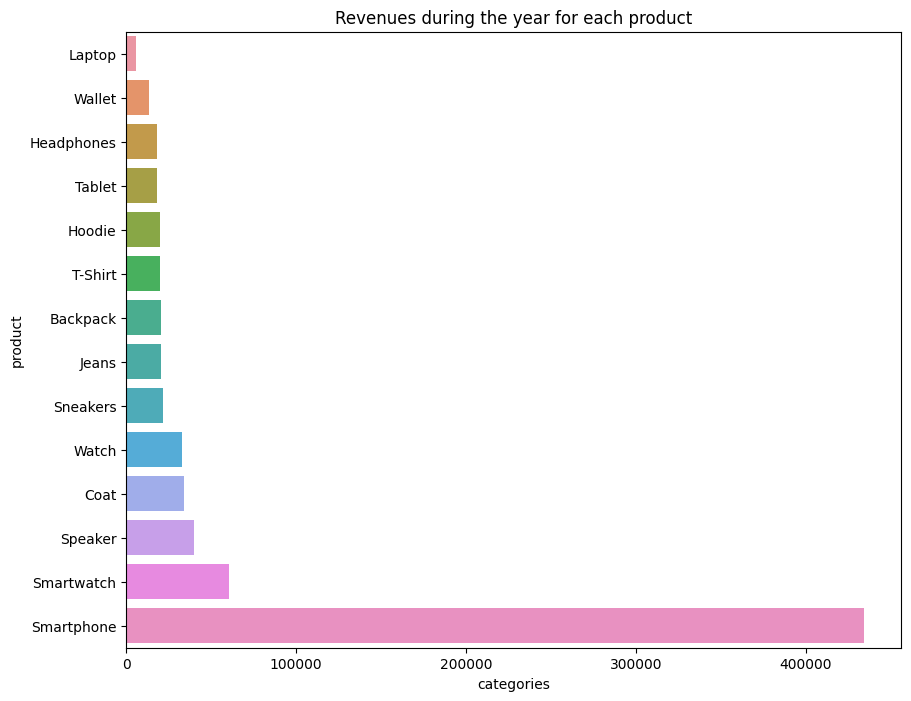

In [20]:
#Which product had the highest revenue? How much revenue did it generate?
plt.Figure(figsize=(15,6))
f, ax = plt.subplots(1, figsize=(10,8))
plt.title("Revenues during the year for each product")
sns.barplot(y=product_vs_revenue['product'], 
            x=product_vs_revenue["revenue"], 
            errorbar=None)
plt.xlabel("categories")

In [21]:
query_2 = """
            SELECT AVG(revenue)
            FROM sales_data
            WHERE date BETWEEN "2022-01-01" AND "2022-03-31"
          """
Q1_AVG = SQL(query_2)
float(Q1_AVG.iloc[0])

1979.3478260869565

In [22]:
query_3 = """
            SELECT AVG(revenue)
            FROM sales_data
            WHERE date BETWEEN "2022-04-01" AND "2022-06-30"
          """
Q2_AVG = SQL(query_3)
float(Q2_AVG.iloc[0])

2043.6263736263736

In [23]:
query_4 = """
            SELECT AVG(revenue)
            FROM sales_data
            WHERE date BETWEEN "2022-07-01" AND "2022-09-30"
          """
Q3_AVG = SQL(query_4)
float(Q3_AVG.iloc[0])

2148.695652173913

In [24]:
query_5 = """
            SELECT AVG(revenue)
            FROM sales_data
            WHERE date BETWEEN "2022-10-01" AND "2022-12-31"
          """
Q4_AVG = SQL(query_5)
float(Q4_AVG.iloc[0])

2079.3548387096776

In [25]:
#What was the total revenue generated in each quarter of the year? (i.e. Q1, Q2, Q3, Q4)
quarters = pd.DataFrame({"Quarters": ["Q1", "Q2", "Q3", "Q4"], "Average Revenue": [1979.347826, 1992.921348, 2147.582418, 2090.543478]})
quarters

,Quarters,Average Revenue
0,Q1,1979.347826
1,Q2,1992.921348
2,Q3,2147.582418
3,Q4,2090.543478


In [26]:
result = lambda Quarter : float(quarters["Average Revenue"].iloc[Quarter-1])

Text(0.5, 0, 'Quarter')

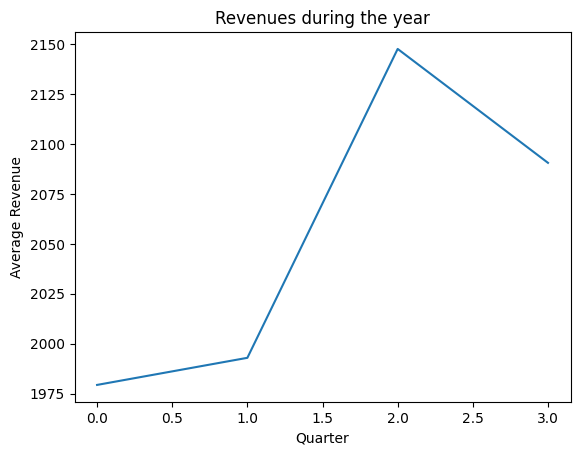

In [27]:
plt.Figure(figsize=(6,6))
plt.title("Revenues during the year")
sns.lineplot(data=quarters, x=quarters.index, y="Average Revenue")
plt.xlabel("Quarter")

In [28]:
#What was the average revenue per sale?
avg_revenue_per_sale = sales_data["revenue"].sum() / len(sales_data)
avg_revenue_per_sale

2062.853260869565

In [29]:
query_6 = """
            SELECT DISTINCT(product), price
            FROM sales_data
            ORDER BY price
          """
product_vs_price = SQL(query_6)
product_vs_price

,product,price
0,T-Shirt,20.0
1,Wallet,30.0
2,Hoodie,40.0
3,Backpack,50.0
4,Jeans,50.0
5,Speaker,80.0
6,Sneakers,80.0
7,Headphones,100.0
8,Coat,100.0
9,Watch,150.0


In [30]:
query_7 = """
            SELECT category, SUM(revenue) AS "total revenue"
            FROM sales_data
            GROUP BY category
            ORDER BY revenue
          """
category_vs_revenue = SQL(query_7)
category_vs_revenue

,category,total revenue
0,Shoes,21600.0
1,Bags,20400.0
2,Clothing,94350.0
3,Accessories,106700.0
4,Electronics,516080.0


#Interactive dashboard (additional feature)

In [31]:
#this cell calculates the radian degrees needed to draw a pie chart
from math import pi
percentages = []
angles_degrees = []
angles_radian = []
start_angle = [0]

total_revenues_2022 = category_vs_revenue["total revenue"].sum()

#convert numbers to percentages
for i in category_vs_revenue["total revenue"].tolist():
  percentages.append(i/total_revenues_2022)

#convert percentages to angles (degrees)
for i in percentages:
  angles_degrees.append(i*360)

#convert angles (degrees) to angles (radian)
for i in angles_degrees:
  angles_radian.append(i*pi/180)

#define start positions according to the angles in radian
prev = start_angle[0]
for i in angles_radian[:-1]:
  start_angle.append(i + prev)
  prev += i

end_angle = start_angle[1:] + [0]

In [32]:
end_angle

[0.17877939567014747,
 0.34762660269195345,
 1.128544935167806,
 2.0116820424828403,
 0]

In [33]:
from bokeh.plotting import figure                                   #the figure method is used to create charts
from bokeh.models import FactorRange                                #used in the code for dealing with textual data

In [34]:
#the total revenue over 2022 card
card1 = pn.Card(sales_data["revenue"].sum(), title="the total revenue over 2022", width=350)

#Best selling category card
card2 = pn.Card("Electronics", title="Best selling category", width=350)

#Best selling product card
card3 = pn.Card("Smartphones", title="Best selling product", width=350)

#a slider to let the user choose a quarter to know the average revenue in the quarter
slider = pn.interact(result, Quarter = [1, 2, 3, 4])

#add the slider into the card
card4 = pn.Card(slider, title="average revenue of each quarter", width=350)

#number of products sold in 2022 card
card5 = pn.Card("{} product".format(int(sales_data["quantity"].sum())), title="products sold in 2022", width=350)

#create a line chart (average revenue of each quarter)
p0 = figure(width=400, height=400, title="average revenue of each quarter")
p0.line([1, 2, 3, 4], quarters["Average Revenue"].values.tolist())
p0.xaxis.axis_label = "Quarter"
p0.yaxis.axis_label = "Average Revenue"

#create the layout of the dashboard
col1 = pn.Column(card1, card2, card3)
col2 = pn.Column(card4, card5)
col3 = pn.Column(p0)

row = pn.Row(col1, col2, col3)

#create a bar chart (products vs. revenue)
p1 = figure(width=600, height=600, title="products vs. revenue", y_range=FactorRange(factors = product_vs_revenue["product"].values.tolist()))
p1.hbar(y=product_vs_revenue["product"].values.tolist(), right=product_vs_revenue["revenue"].values.tolist(), height=0.5)
p1.xaxis.axis_label = "Revenue"
p1.yaxis.axis_label = "Product"

#create a bar chart (products vs. price)
p2 = figure(width=600, height=600, title="products vs. price", y_range=FactorRange(factors=product_vs_price["product"].values.tolist()))
p2.hbar(y=product_vs_price["product"].values.tolist(), right=product_vs_price["price"].values.tolist(), height=0.5)
p2.xaxis.axis_label = "Price"
p2.yaxis.axis_label = "Product"

#create a line chart (revenue of each day)
p3 = figure(width=1400, height=600, title="revenue of each day")
p3.line(date_vs_revenue.index, date_vs_revenue["revenue"].values.tolist())
p3.xaxis.axis_label = "Day"
p3.yaxis.axis_label = "Revenue"

#create a pie chart (From where the revenues come from?)
x=0        #center point (x-coordinate)
y=0        #center point (y-coordinate)
r=1        #radius of the circle (pie)

colors = ["lightsteelblue", "powderblue", "lightskyblue", "deepskyblue", "dodgerblue"]

p4 = figure(width=600, height=600, title="From where the revenues come from?")
for i in range(len(colors)):
  p4.wedge(x, y, r, start_angle=start_angle[i], end_angle=end_angle[i], color=colors[i], legend_label=category_vs_revenue["category"].values.tolist()[i])

In [35]:
#create the report
report = ProfileReport(sales_data)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [36]:
#show the dashboard
tabs = pn.Tabs(("important numbers", row), ("products vs. revenue", p1), ("products vs. price", p2), ("revenue of each day", p3), ("percentages", p4))
tabs

Tabs
    [0] Row
        [0] Column
            [0] Card(title='the total revenue o..., width=350)
                [0] Str(float64)
            [1] Card(title='Best selling category', width=350)
                [0] Markdown(str)
            [2] Card(title='Best selling product', width=350)
                [0] Markdown(str)
        [1] Column
            [0] Card(title='average revenue o..., width=350)
                [0] Column
                    [0] Column
                        [0] DiscreteSlider(formatter='%d', name='Quarter', options=[1, 2, 3, 4], value=1)
                    [1] Row
                        [0] Str(float, name='interactive00119')
            [1] Card(title='products sold in 2022', width=350)
                [0] Markdown(str)
        [2] Column
            [0] Bokeh(Figure)
    [1] Bokeh(Figure, name='products vs. revenue')
    [2] Bokeh(Figure, name='products vs. price')
    [3] Bokeh(Figure, name='revenue of each day')
    [4] Bokeh(Figure, name='percentages')